In [1]:
# 1. 기본 라이브러리 불러오기
import cv2 # computer vision
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm

In [2]:
# 2. CalcHistogram(img,num_bin)를 정의하기
def CalcHistogram(img,num_bin):
    h,w = img.shape
    hist = np.zeros(num_bin) # 2^bit bit=8 -> 256 
    for i in range(0,h):
        for j in range(0,w):
            hist[img[i,j]] += 1
    return hist 

In [3]:
# 3. ‘Lenna. png’를 흑백영상으로 읽은 후 영상의 크기를 자동으로 구하기
img = cv2.imread("image/Lenna.png", cv2.IMREAD_GRAYSCALE)
#img = np.array([[2,4,4,3],[2,1,3,3],[1,0,1,2],[0,1,1,2]])
h,w = img.shape
N = h*w
#print(N)

In [4]:
# (1단계) 입력 영상의 히스토그램 생성하기
bit = 8
num_bin = 2**bit
I_max = num_bin - 1
hist = CalcHistogram(img,num_bin)

In [6]:
# (2단계) 히스토그램 누적합 생성
#np.cumsum : sumulative sum(누적합)
#hist_sum = np.zeros(num_bin)
#for i in range(0,num_bin):
#    for j in range(0,i):
#        fist_sum[i] =+hist[j]
        
hist_sum = np.cumsum(hist)
#print(hist)
#print(hist_sum)

In [10]:
# (3단계) 히스토그램 누적합 정규화 - 반올림
hist_sum_norm = np.round(hist_sum/N*I_max)
#print(hist_sum_norm)

In [12]:
# (4단계) 히스토그램 평활화 결과 생성
#n[i] = sum[i]*(1/(h*w))*2^bit
result = np.zeros((h,w))
for i in range(0,h):
    for j in range(0,w):
        result[i,j] = hist_sum_norm[img[i,j]]
        
result = np.uint8(result)
hist1 = CalcHistogram(result,num_bin)
#print(img)
#print(result)

AttributeError: 'AxesImage' object has no property 'camp'

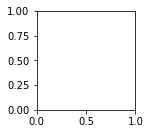

In [13]:
# 6. matplotlib.pyplot을 이용하여 결과 히스토그램을 출력하기
plt.subplot(2,2,1); plt.imshow(img, camp='gray', norm=NoNorm())
plt.subplot(2,2,2); plt.imshow(result, camp='gray', norm=NoNorm())
plt.subplot(2,2,3); plt.bar(range(0,num_bin),hist)
plt.subplot(2,2,4); plt.bar(range(0,num_bin),hist1)